# Explore here

In [5]:
# Your code here
import os
import shutil
import random

lista_fotografias = os.listdir('../data/raw/train')

for fotografia in lista_fotografias:
    if not fotografia.endswith('.jpg'):
        continue
    if 'cat' in fotografia:
        #2 de cada 10 veces mover el archivo a processed/test/cat y 8 de cada 10 veces a processed/train/cat
        if random.random() < 0.2:
            destino = '../data/processed/test/cat'
        else:
            destino = '../data/processed/train/cat'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    elif 'dog' in fotografia:
        if random.random() < 0.2:
            destino = '../data/processed/test/dog'
        else:
            destino = '../data/processed/train/dog'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    else:
        print(f'Animal desconocido: {fotografia}')


In [ ]:
#cambiar de tamaño las imagenes para que todas sean de 200x200
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

def resize_images(directory, size=(200, 200)):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=size)
            img_array = img_to_array(img)
            save_img(img_path, img_array)

resize_images('../data/processed/train/cat')
resize_images('../data/processed/train/dog')
#resize_images('../data/processed/test/cat')
#resize_images('../data/processed/test/dog')

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/test/cat'

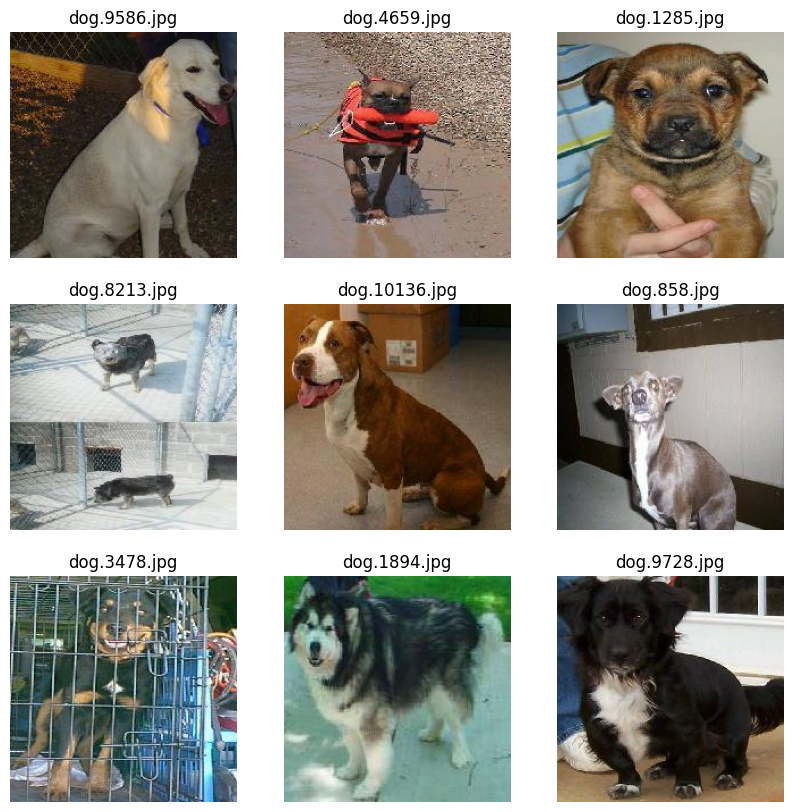

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/dog'))
    img = load_img(os.path.join('../data/processed/train/dog', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')

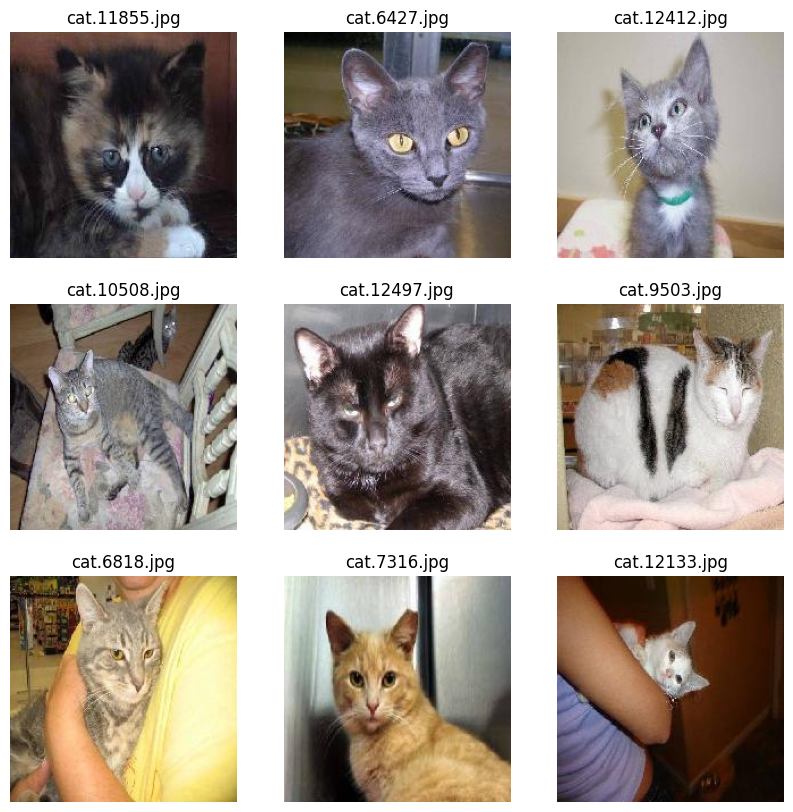

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/cat'))
    img = load_img(os.path.join('../data/processed/train/cat', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')

In [ ]:
#mover los archivos de la carpeta test desde las subcarpetas dog y cat a la carpeta test

for subdir in ['cat', 'dog']:
    subdir_path = os.path.join('../data/processed/test', subdir)
    for filename in os.listdir(subdir_path):
        if filename.endswith('.jpg'):
            src_path = os.path.join(subdir_path, filename)
            dest_path = os.path.join('../data/processed/test', filename)
            shutil.move(src_path, dest_path)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/processed/train'
test_dir = '../data/processed/'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              classes=['cat', 'dog']
)
test_data = datagentest.flow_from_directory(test_dir,
                                            target_size=(200, 200),
                                            batch_size=32,
                                            classes=['test']
)

Found 19900 images belonging to 2 classes.
Found 5100 images belonging to 1 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling

model = Sequential()
model.add(Rescaling(1./255, input_shape=(200, 200, 3)))
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))


/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-08 22:56:29.578267: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-08-08 22:56:29.578306: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-08-08 22:56:29.578309: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
I0000

In [11]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
model.fit(train_data,
          epochs=1)

622/622 ━━━━━━━━━━━━━━━━━━━━ 324s 521ms/step - accuracy: 0.4978 - loss: 0.6937


In [ ]:
import tensorflow as tf
# Ensure TensorFlow uses the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            print(gpu)
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow is using the GPU.")
    except RuntimeError as e:
        print(e)
else:
    print("TensorFlow is not using the GPU. Check your TensorFlow installation.")

Available GPUs: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
TensorFlow is using the GPU.


In [ ]:
# Hacer predicciones con el modelo
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_image(model, img_path):
    img = load_img(img_path, target_size=(200, 200))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)
    return predictions

import random
import os
import shutil
# Example usage
img_path = random.choice(os.listdir('../data/processed/test'))
predictions = predict_image(model, os.path.join('../data/processed/test', img_path))
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class for {img_path}: {predicted_class}")

# Save the model
model.save('../models/cat_dog_classifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Predicted class for cat.1249.jpg: [1]
